## **1. Import Library**

Mengimport library-library yang dibutuhkan untuk membuat model

In [88]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

## **2. Data Loading**

In [ ]:
data = pd.read_csv('Medicaldataset.csv')
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## **3. Eksplorasi Data**

### 3.1. Deskripsi Variabel

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


**Insight**
- Tidak ada indikasi missing value

Analisis statistik deskriptif pada variabel

In [91]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


### 3.2. Menangani Missing Value dan Outlier

Melihat apakah terdapat missing values pada dataset

In [92]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

**Insight**
- Tidak ada missing value

Melihat total kategori pada fitur gender

In [93]:
print(data['Gender'].value_counts())

Gender
1    870
0    449
Name: count, dtype: int64


**Insight**
- Terdapat kategori yang hanya ada 18 dari total keseluruhan data dan sangat timpang jumlah data keseluruhan.

Mangganti kategori yang jumlahnya sangat kecil dengan modus dari kategori lain.

In [94]:
Gender = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].replace('Other', Gender)

Mengecek dan menangani Outlier

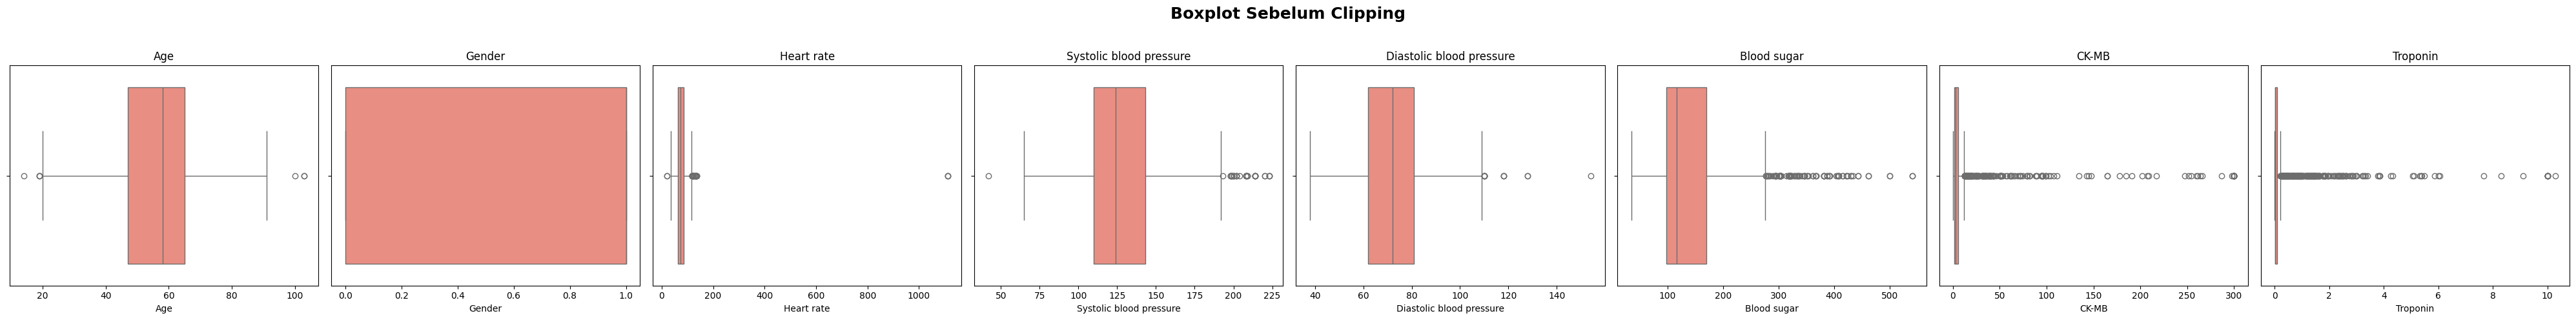

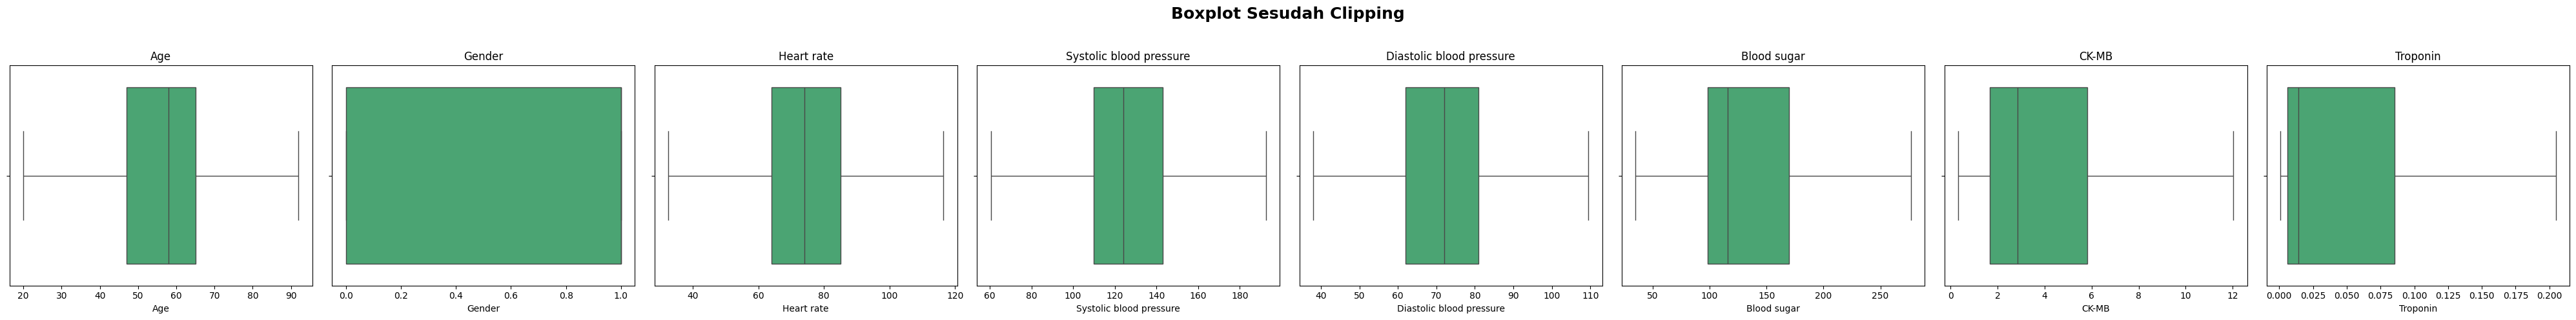

In [95]:
numeric = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
outlierValues = {}
data_before_clipping = data[numeric].copy()

# Deteksi dan Clipping Outlier
for col in numeric:
    q1, q3 = np.percentile(data[col].dropna(), [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    outliers = data[col][(data[col] < lower) | (data[col] > upper)]
    outlierValues[col] = outliers

    data[col] = np.clip(data[col], lower, upper)

# Visualisasi Boxplot SEBELUM Clipping
fig, axes = plt.subplots(1, len(numeric), figsize=(5 * len(numeric), 5))
fig.suptitle("Boxplot Sebelum Clipping", fontsize=18, fontweight='bold')
for ax, col in zip(axes, numeric):
    sns.boxplot(x=data_before_clipping[col], ax=ax, color='salmon')
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

# Visualisasi Boxplot SESUDAH Clipping
fig, axes = plt.subplots(1, len(numeric), figsize=(5 * len(numeric), 5))
fig.suptitle("Boxplot Sesudah Clipping", fontsize=18, fontweight='bold')
for ax, col in zip(axes, numeric):
    sns.boxplot(x=data[col], ax=ax, color='mediumseagreen')
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 3.3. Univariate Analysis

Visualisasi distibusi nilai kolom numerik.

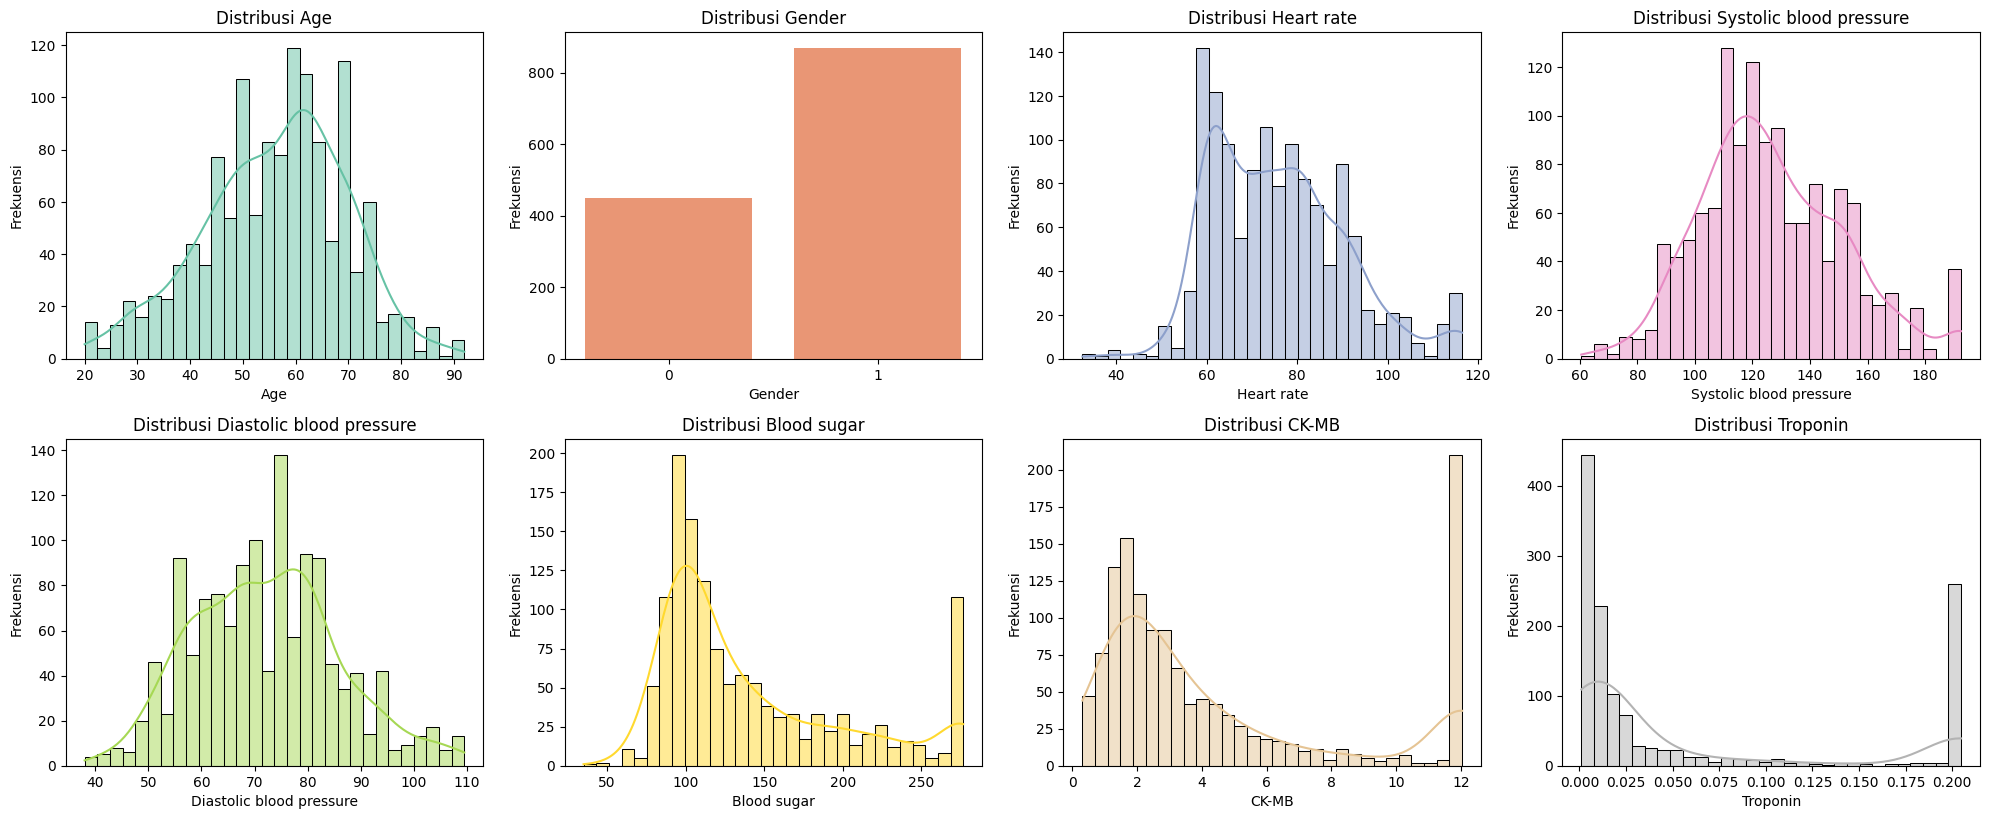

In [96]:
rows, cols = 4, 4
plt.figure(figsize=(5 * cols, 4 * rows))
colors = sns.color_palette("Set2", len(numeric))

for i, col in enumerate(numeric):
    plt.subplot(rows, cols, i + 1) 
    if data[col].nunique() > 10:
        sns.histplot(data[col].dropna(), bins=30, kde=True, color=colors[i])
    else:
        sns.countplot(x=data[col], color=colors[i])

    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


### 3.4. Multivariate Analysis

Melihat rata rata diabetes dibandingkan fitur lain dalam dataset

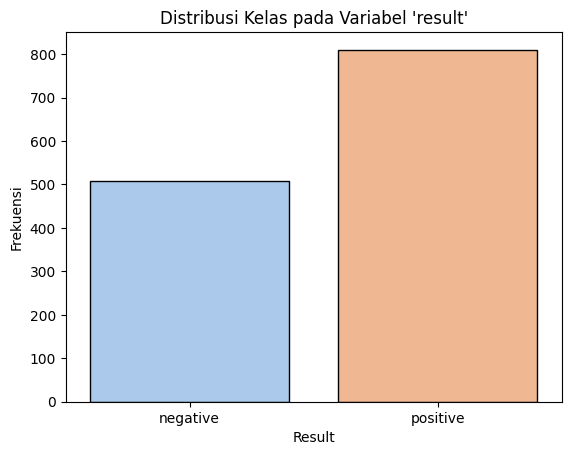

In [97]:
sns.countplot(
    x='Result', 
    data=data,
    hue='Result',
    palette="pastel",  
    edgecolor="black", 
    legend=False
)

plt.title("Distribusi Kelas pada Variabel 'result'")
plt.xlabel('Result')  
plt.ylabel('Frekuensi') 
plt.show()


Visualisasikan hubungan antar variabel

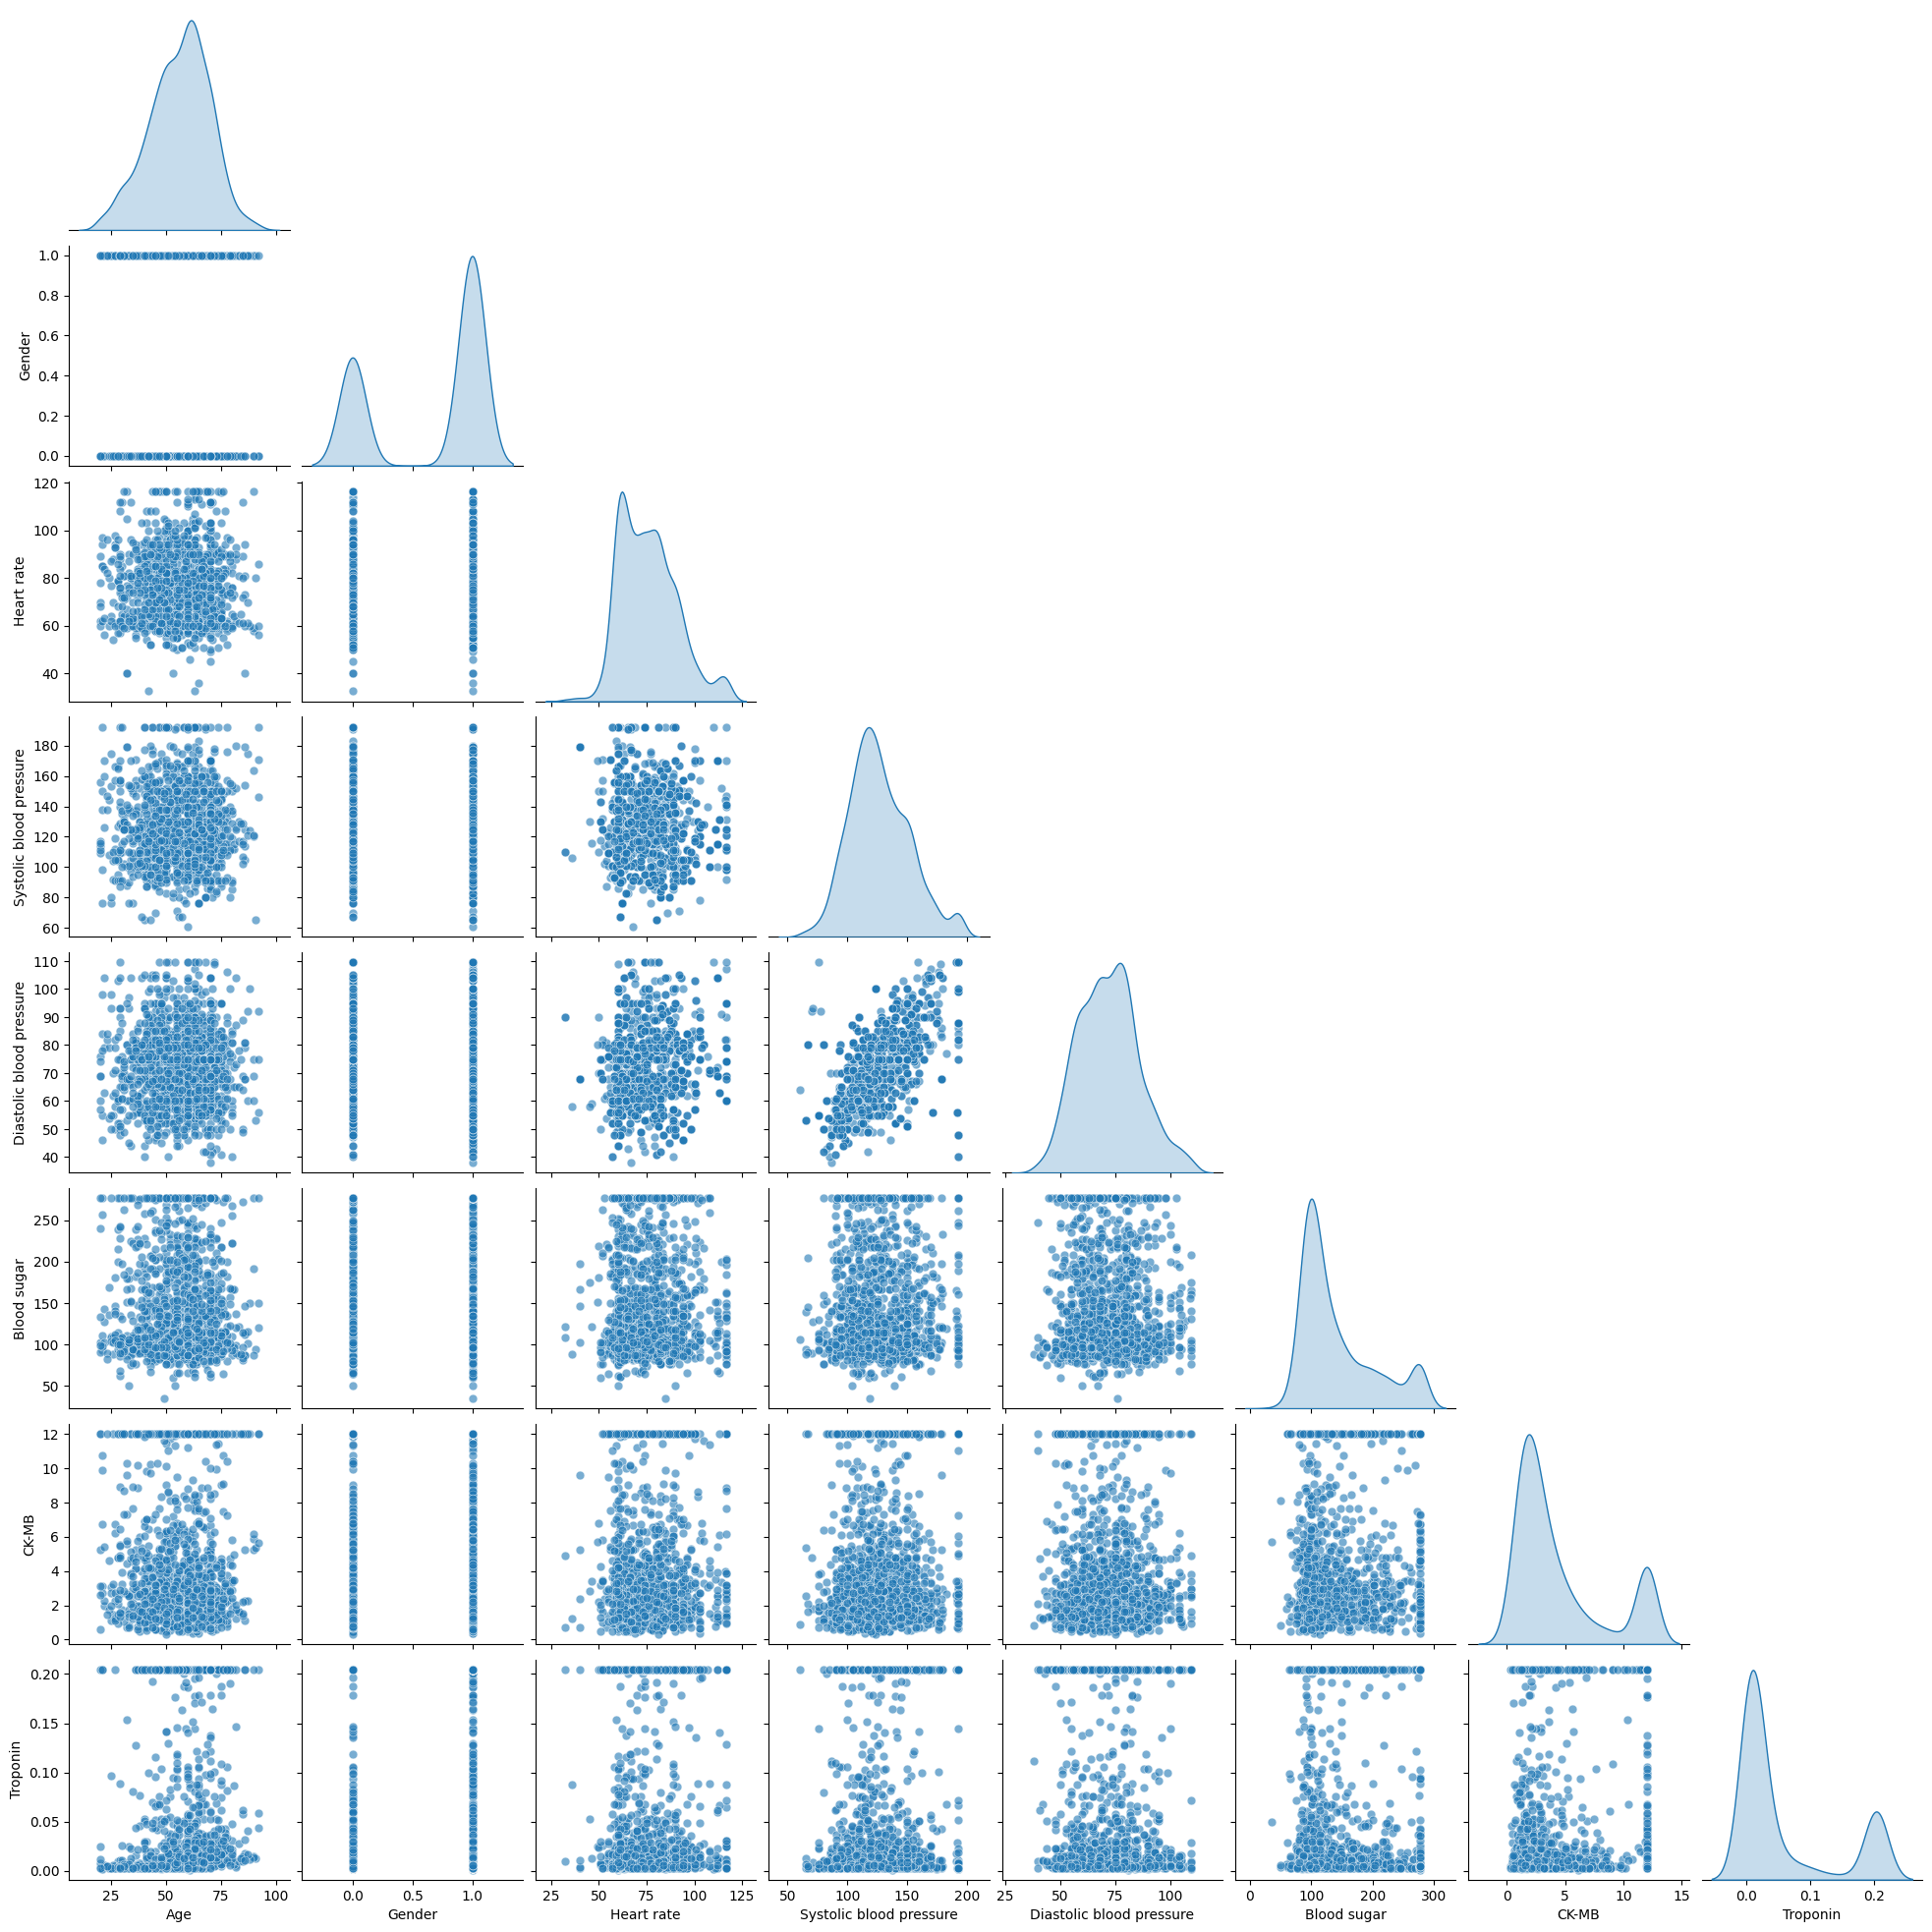

In [98]:
sns.pairplot(data, diag_kind='kde', kind='scatter', plot_kws={'alpha':0.6, 's':40}, corner=True)
plt.show()

Visualisasi correlation matrix

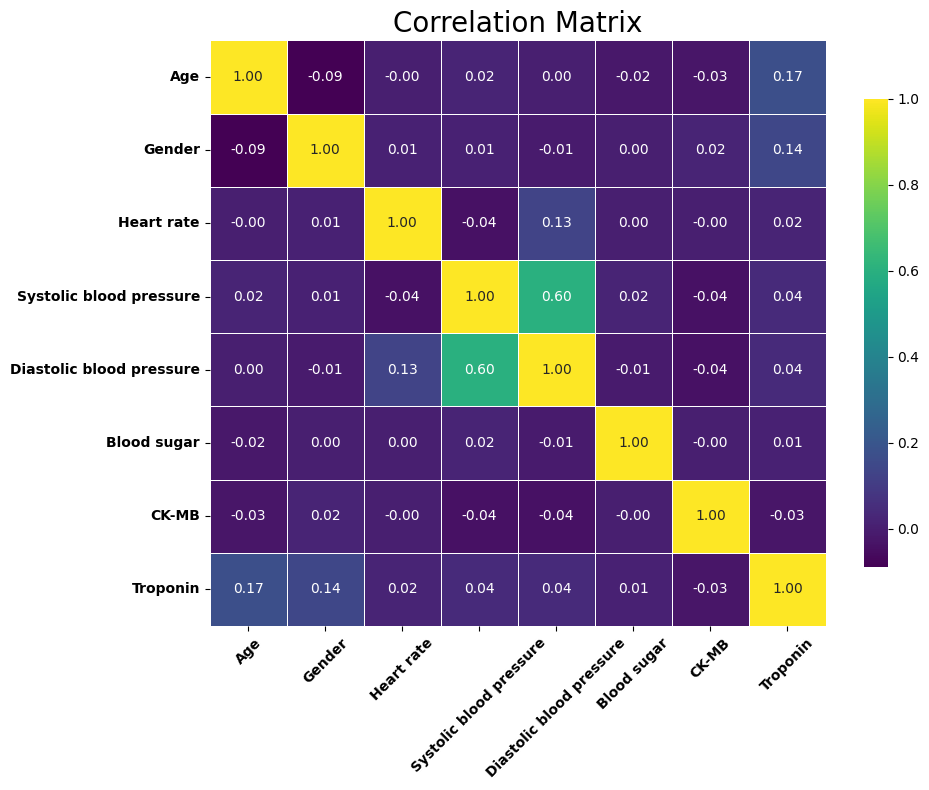

In [99]:
numeric = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric].corr().round(2)

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='viridis',
    linewidths=0.5, 
    fmt='.2f', 
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()


## **4. Data Preparation**

### 4.1. Standarisasi Fitur

Melakukan standarisasi menggunakan StandardScaler untuk menyamakan rentang nilai dan melihat hasil perubahan

In [100]:
numeric = ['Age','Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,0.577235,1,-0.670969,1.325773,0.787875,0.316482,-0.696465,-0.593247,negative
1,-2.595152,1,1.220652,-1.152207,-1.907768,2.287105,0.597906,1.863325,positive
2,-0.086753,1,-0.806085,1.325773,0.350743,2.173172,-0.646782,-0.707951,negative
3,0.577235,1,-0.400738,-0.272924,-1.252071,2.173172,1.978569,0.808687,positive
4,-0.086753,1,-0.806085,-0.592663,-0.523519,2.287105,-0.884737,-0.707951,negative


### 4.2. Spliting Data

Membagi data menjadi train dan test dengan komposisi 20 % untuk test dan 80% untuk train

In [101]:
X = data.drop(columns=["Result"])  
y = data["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1055, 8)
y_train shape: (1055,)
X_test shape: (264, 8)
y_test shape: (264,)


## **5. Model Development**

### 5.1. Random Forest

Load model Random Forest

In [102]:
# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit model dengan tuning hyperparameters
grid_search_rf.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9886336657169991


### 5.2. Naive Bayes

Load model Naive Bayes

In [103]:
# Parameter grid untuk tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0], 
    'fit_prior': [True, False]
}

# Inisialisasi BernoulliNB
naive_bayes = BernoulliNB()

# Inisialisasi GridSearchCV
grid_search_nv = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit model dengan tuning hyperparameters
grid_search_nv.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"Best Parameters: {grid_search_nv.best_params_}")
print(f"Best Score: {grid_search_nv.best_score_}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'alpha': 1.0, 'fit_prior': True}
Best Score: 0.8094594448761115


### 5.3 Decision Tree

Load model Decision Tree

In [104]:
# Tentukan parameter grid untuk tuning
param_grid = {
    'criterion': ['gini', 'entropy'],                
    'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],                  
    'min_samples_leaf': [1, 2, 4],                  
    'max_features': [None, 'sqrt', 'log2']        
}

# Inisialisasi DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit model dengan tuning hyperparameters
grid_search_dt.fit(X_train, y_train)

# Tampilkan hasil terbaik
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Best Score: {grid_search_dt.best_score_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.9924242424242425


## **6. Evaluasi Model**

### 6.1. Random Forest

Evaluasi model Random Forest.

Akurasi: 0.9811

Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



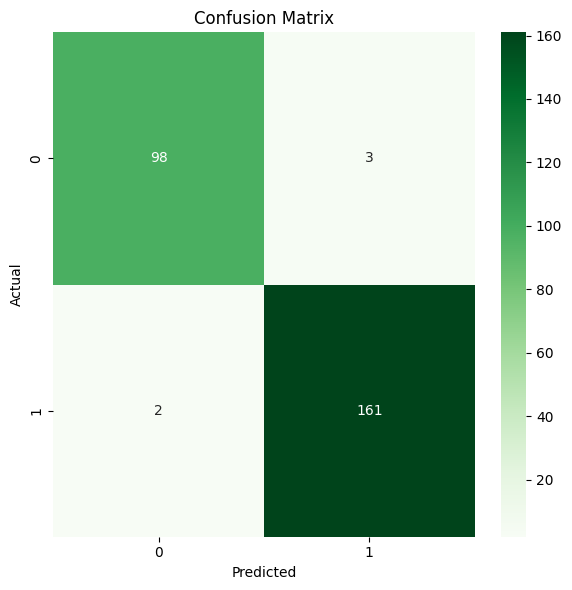

In [105]:
# Gunakan parameter terbaik untuk melatih model akhir
rf_model = grid_search_rf.best_estimator_
y_pred_rf = rf_model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### 6.2. Naive Bayes

Evaluasi model Naive Bayes.

Akurasi: 0.8030

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.79      0.75       101
    positive       0.86      0.81      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.80      0.80       264
weighted avg       0.81      0.80      0.80       264



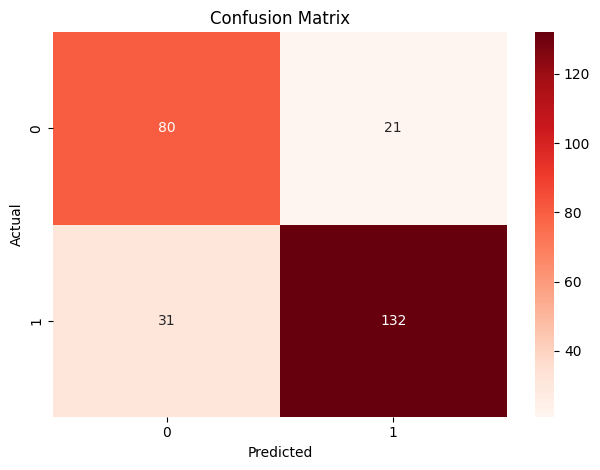

In [106]:
nb_model = grid_search_nv.best_estimator_
y_pred_nb = nb_model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### 6.3. Decision Tree

Evaluasi model Decision Tree.

Akurasi: 0.9773

Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.97      0.97       101
    positive       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



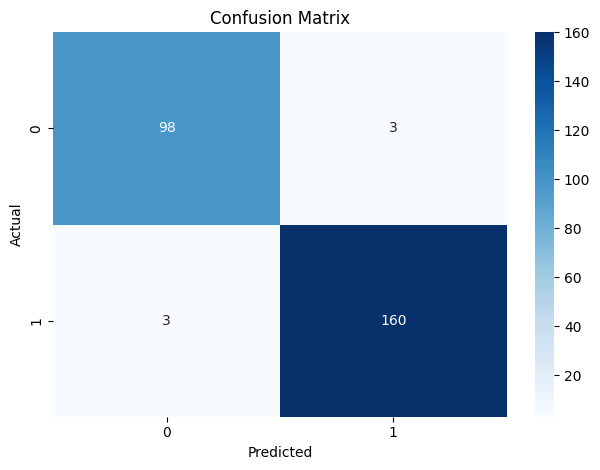

In [107]:
dt_model = grid_search_dt.best_estimator_ 
y_pred_dt = dt_model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
